In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline


In [3]:
# Load the wholesale customers dataset
try:
    data = pd.read_csv("big_query_filtered_list.csv")
    #data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print("Github dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Github dataset has 19139 samples with 19 features each.


In [6]:
data.head()

,org_avatar_url,org_url,org_login,org_id,repo_name,repo_url,repo_id,created_at,base_repo_forks,base_repo_watchers,base_repo_open_issue_count,base_repo_forks_count,base_repo_has_wiki,base_repo_language,base_repo_watchers_count,base_repo_stargazers_count,base_repo_has_pages,base_repo_has_downloads,rnk_records
0,https://avatars.githubusercontent.com/u/790012?,https://api.github.com/orgs/xamarin,xamarin,790012,xamarin/ios-samples,https://api.github.com/repos/xamarin/ios-samples,368192,2019-10-04 20:54:10 UTC,1778,1352,16,1778,False,C#,1352,1352,False,True,1
1,https://avatars.githubusercontent.com/u/47359?,https://api.github.com/orgs/apache,apache,47359,apache/libcloud,https://api.github.com/repos/apache/libcloud,419555,2019-10-11 12:17:22 UTC,829,1538,19,829,False,Python,1538,1538,False,True,1
2,https://avatars.githubusercontent.com/u/6183?,https://api.github.com/orgs/thoughtbot,thoughtbot,6183,thoughtbot/dotfiles,https://api.github.com/repos/thoughtbot/dotfiles,1252522,2019-10-11 13:38:30 UTC,1641,5704,8,1641,False,Shell,5704,5704,False,True,1
3,https://avatars.githubusercontent.com/u/866922?,https://api.github.com/orgs/sleuthkit,sleuthkit,866922,sleuthkit/autopsy,https://api.github.com/repos/sleuthkit/autopsy,2516243,2019-10-11 14:11:05 UTC,317,808,247,317,False,Java,808,808,False,True,1
4,https://avatars.githubusercontent.com/u/3731824?,https://api.github.com/orgs/typelevel,typelevel,3731824,typelevel/kind-projector,https://api.github.com/repos/typelevel/kind-pr...,3533170,2019-10-03 10:47:57 UTC,46,684,12,46,False,Scala,684,684,False,True,1


In [0]:
df = data[["repo_id","created_at","base_repo_forks","base_repo_watchers","base_repo_open_issue_count","base_repo_forks_count","base_repo_has_wiki"	,"base_repo_language"]]

In [8]:
df.drop(['repo_id','created_at','base_repo_language','base_repo_has_wiki','base_repo_forks_count'], axis = 1, inplace = True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [9]:
df.head()

,base_repo_forks,base_repo_watchers,base_repo_open_issue_count
0,1778,1352,16
1,829,1538,19
2,1641,5704,8
3,317,808,247
4,46,684,12


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

#  .: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = df.drop('base_repo_watchers',1)

#  .: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data, df.base_repo_watchers, test_size = 0.25, random_state=100)

#  .: Create a decision tree regressor and fit it to the training set
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

#  .: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)
print ("The prediction score R^2 on the test set is: %0.2f" % score)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


The prediction score R^2 on the test set is: 0.61


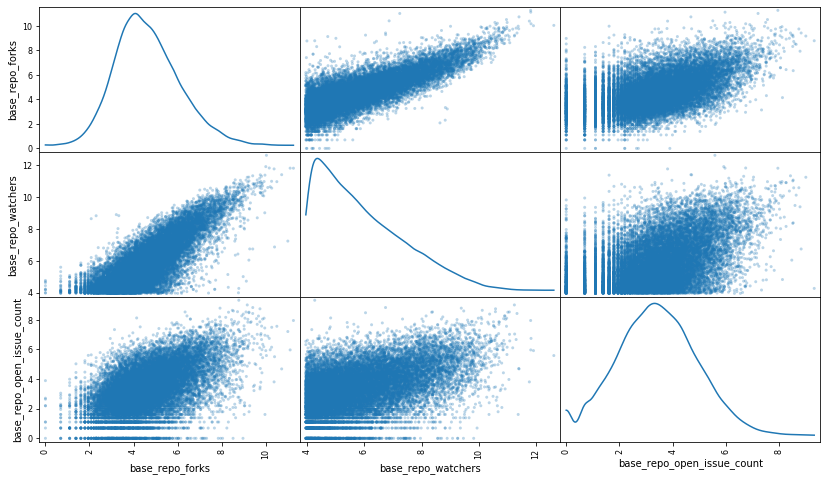

In [11]:
#  .: Scale the data using the natural logarithm
log_data = np.log(df+1)


# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

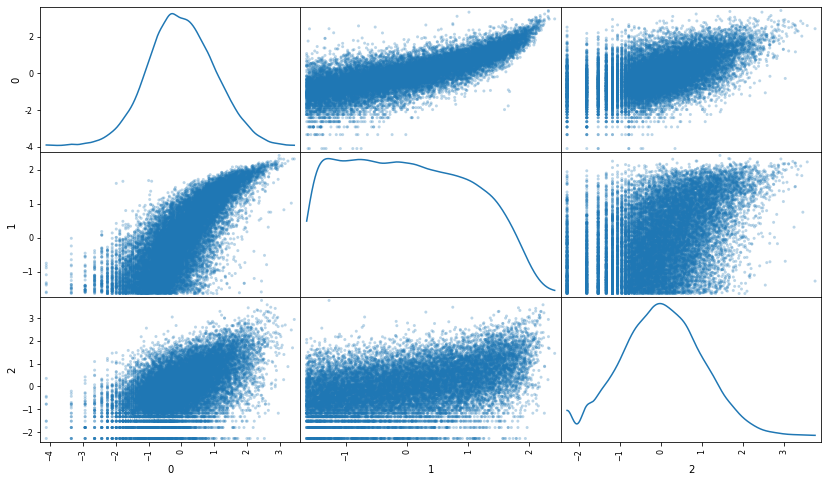

In [20]:
#  .: Scale the data using the natural logarithm
import sklearn
from sklearn.preprocessing import power_transform
power_data = sklearn.preprocessing.power_transform((df+1).to_numpy(), method='box-cox', standardize=True, copy=True)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(pd.DataFrame(power_data), alpha = 0.3, figsize = (14,8),diagonal='kde');

In [0]:
log_data = pd.DataFrame(power_data,columns=['base_repo_forks','base_repo_watchers','base_repo_open_issue_count'])

In [26]:
from collections import Counter

out_list=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    #  .: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    #  .: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    #  .: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    #Store outliers in a list
    for elm in log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index:
        out_list.append(elm)

Data points considered outliers for the feature 'base_repo_forks':


,base_repo_forks,base_repo_watchers,base_repo_open_issue_count
343,-2.927250,-1.146437,-1.806946
351,2.888800,2.156087,0.692376
382,2.850615,2.126268,2.877405
417,-3.347598,-1.093624,-0.950622
492,-4.108703,-1.327538,-0.780802
...,...,...,...
18765,-3.347598,-1.379266,-1.806946
18913,2.871783,2.124726,2.383427
19043,-3.347598,-1.621409,-2.287838
19096,3.155452,2.175622,2.690539


Data points considered outliers for the feature 'base_repo_watchers':


,base_repo_forks,base_repo_watchers,base_repo_open_issue_count


Data points considered outliers for the feature 'base_repo_open_issue_count':


,base_repo_forks,base_repo_watchers,base_repo_open_issue_count
382,2.850615,2.126268,2.877405
885,2.030197,1.821398,3.443494
932,1.746497,1.359907,2.995550
1172,2.618548,2.129817,2.863638
1193,2.639474,0.305550,3.253889
...,...,...,...
18230,1.577487,0.117233,2.665381
18315,2.496234,2.163877,3.124725
19039,2.043252,1.377761,2.892267
19075,2.435603,-1.278640,3.766951


In [0]:
cnt = {}
outlier = []
for el in set(out_list):
     cnt[el]=out_list.count(el)

In [28]:
for el in cnt.keys():
    if cnt[el]>0:
        print ("The data point %s is considered as an outlier for %s features"%(el,cnt[el]))
        outlier.append(el)

The data point 10752 is considered as an outlier for 1 features
The data point 11780 is considered as an outlier for 2 features
The data point 1029 is considered as an outlier for 1 features
The data point 7686 is considered as an outlier for 1 features
The data point 10763 is considered as an outlier for 1 features
The data point 12306 is considered as an outlier for 1 features
The data point 9236 is considered as an outlier for 1 features
The data point 15892 is considered as an outlier for 1 features
The data point 1559 is considered as an outlier for 1 features
The data point 10782 is considered as an outlier for 1 features
The data point 5151 is considered as an outlier for 1 features
The data point 10272 is considered as an outlier for 1 features
The data point 16415 is considered as an outlier for 1 features
The data point 16417 is considered as an outlier for 1 features
The data point 16939 is considered as an outlier for 1 features
The data point 16940 is considered as an outl

In [29]:
len(outlier)

183

In [0]:
# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outlier]).reset_index(drop = True)

PCA results:


,base_repo_forks,base_repo_watchers,base_repo_open_issue_count
0,0.610217,0.610570,0.504816
1,0.264953,0.443232,-0.856356


The cumulative explained variance is:
Dimension 1    0.7177
Dimension 2    0.9224
Name: Explained Variance, dtype: float64



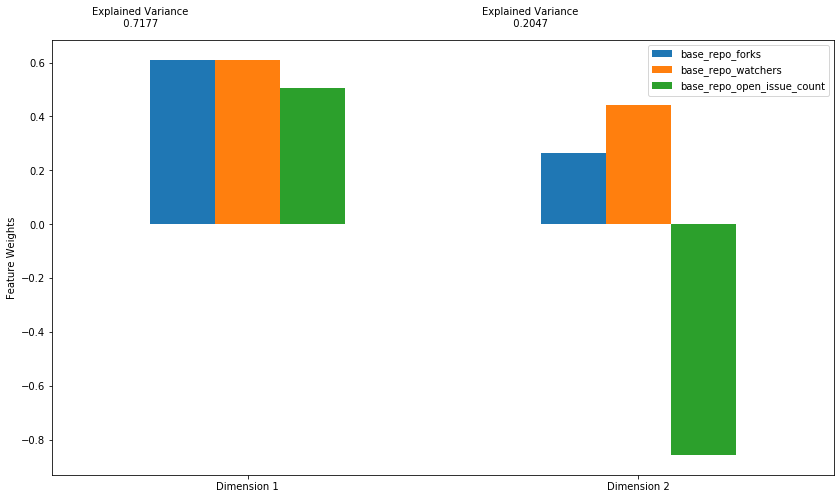

In [31]:
from sklearn.decomposition import PCA
#  .: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=2)
pca.fit(good_data)

#  .: Transform log_samples using the PCA fit above
#pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)
print ("PCA results:")
df = pd.DataFrame(pca.components_, columns=list(good_data.columns))
display(df)

print ("The cumulative explained variance is:")
print (pca_results['Explained Variance'].cumsum())
print ("")

In [0]:
#  .: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)

#  .: Transform the good data using the PCA fit above
reduced_data = pca.fit_transform(good_data)

#  .: Transform log_samples using the PCA fit above
#pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

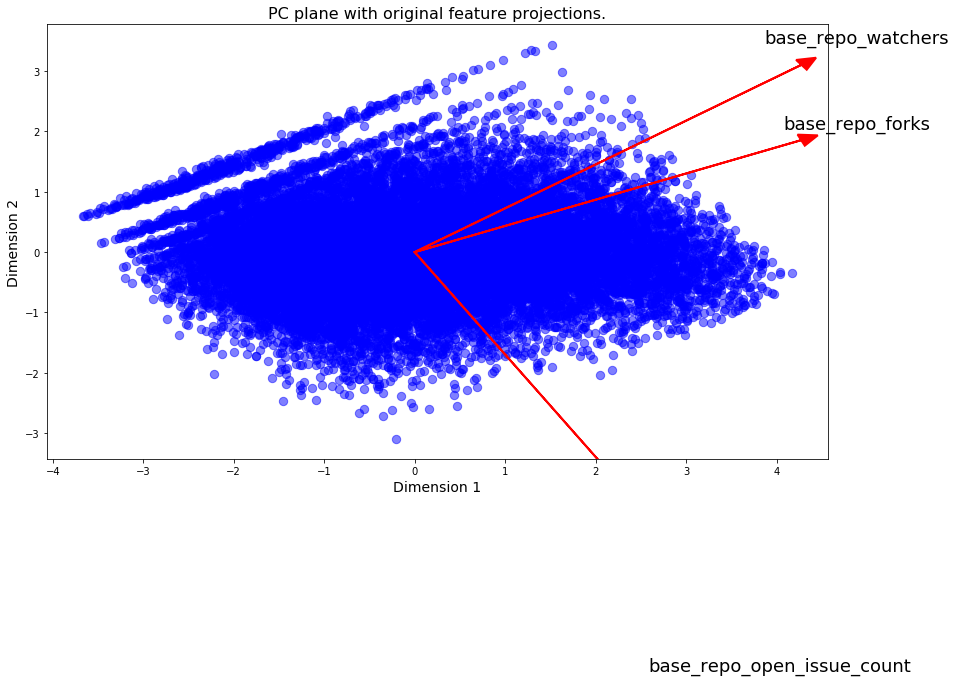

In [33]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

In [34]:
from sklearn.cluster import KMeans
#from sklearn.mixture import GMM
from sklearn.metrics import silhouette_score

#  .: Apply your clustering algorithm of choice to the reduced data 
clusterer = KMeans(n_clusters=3, random_state=100,n_jobs=-1)
clusterer.fit(reduced_data)

#  .: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)


#  .: Find the cluster centers
centers = clusterer.cluster_centers_

#  .: Predict the cluster for each transformed sample data point
#sample_preds = clusterer.predict(pca_samples)

#  .: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print ("The silhouette score is: %0.3f" % score)

The silhouette score is: 0.351


In [35]:
from sklearn import cluster
spectral = cluster.SpectralClustering(n_clusters=3,  n_init = 500,
                                          eigen_solver='arpack',
                                          affinity="nearest_neighbors")
spectral.fit(reduced_data)

SpectralClustering(affinity='nearest_neighbors', assign_labels='kmeans',
                   coef0=1, degree=3, eigen_solver='arpack', eigen_tol=0.0,
                   gamma=1.0, kernel_params=None, n_clusters=3, n_init=500,
                   n_jobs=None, n_neighbors=10, random_state=None)

In [36]:
#  .: Predict the cluster for each data point
preds = spectral.labels_.astype(np.int)


#  .: Find the cluster centers
#centers = spectral.cluster_centers_

#  .: Predict the cluster for each transformed sample data point
#sample_preds = clusterer.predict(pca_samples)

#  .: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print ("The silhouette score is: %0.3f" % score)

The silhouette score is: 0.341


In [37]:
from time import time
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)
t0 = time()
clustering.fit(reduced_data)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [38]:
#  .: Predict the cluster for each data point
preds = clustering.fit_predict(reduced_data)


#  .: Find the cluster centers
#centers = clusterer.cluster_centers_

#  .: Predict the cluster for each transformed sample data point
#sample_preds = clusterer.predict(pca_samples)

#  .: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print ("The silhouette score is: %0.3f" % score)

The silhouette score is: 0.309


Text(0, 0.5, 'Feature 2')

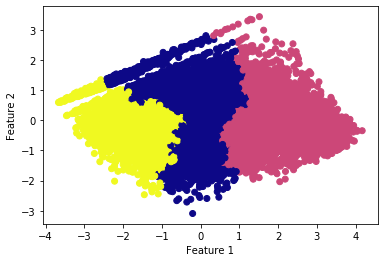

In [39]:
plt.scatter(reduced_data["Dimension 1"], reduced_data["Dimension 2"], c=preds, cmap="plasma")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

In [40]:
reduced_data.head()

,Dimension 1,Dimension 2
0,1.541376,1.217696
1,1.382518,1.043431
2,1.664647,1.836612
3,1.657723,-0.667634
4,-0.183855,0.594825


Text(0, 0.5, 'Feature 1')

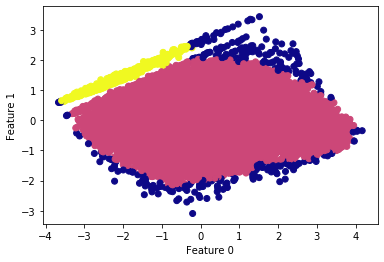

In [41]:
# cluster the data into five clusters
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(reduced_data)
dbscan = DBSCAN(eps=0.2, min_samples = 25)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(reduced_data["Dimension 1"], reduced_data["Dimension 2"], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Automatically created module for IPython interactive environment
Silhouette score and actual cluster representation
For n_clusters = 3 The average silhouette_score is : 0.3513013886524412


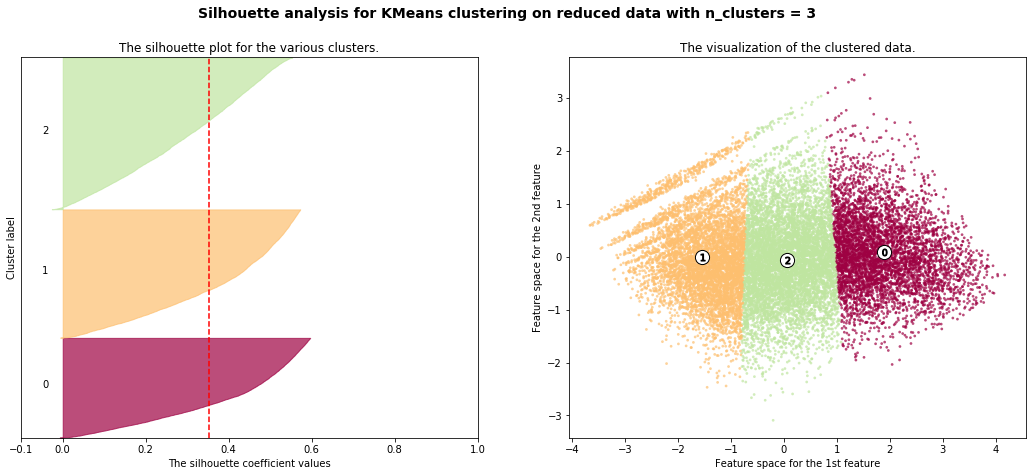

For n_clusters = 4 The average silhouette_score is : 0.3553874077833083


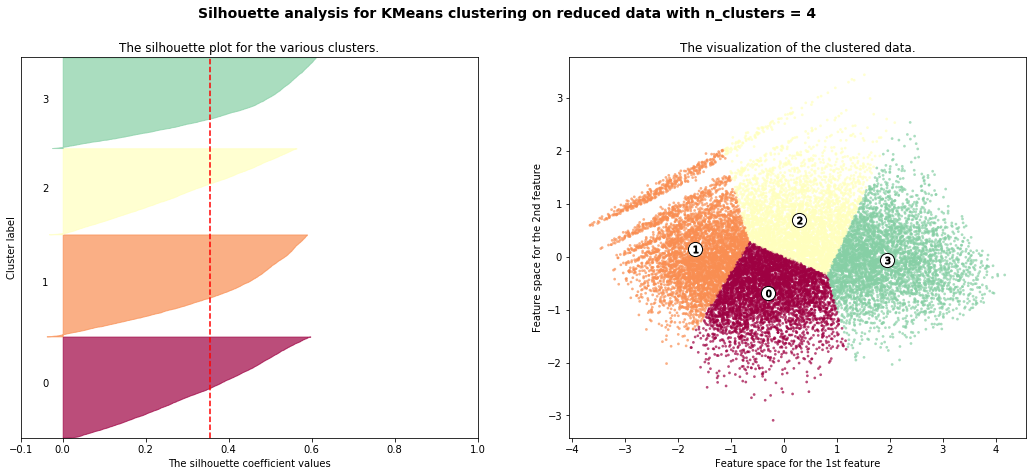

In [42]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)
range_n_clusters = [3, 4]

print("Silhouette score and actual cluster representation")
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(reduced_data) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=100,n_jobs=-1,n_init=200,max_iter = 100000)
    cluster_labels = clusterer.fit_predict(reduced_data)
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(reduced_data, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(reduced_data, cluster_labels)
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(reduced_data.values[:,0], reduced_data.values[:,1], marker='.', s=30, lw=0, alpha=0.7,c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on reduced data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()




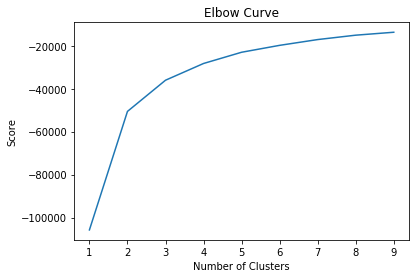

In [31]:
import pandas
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

Y = reduced_data.values

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i,random_state=100,n_jobs=-1,n_init=200,max_iter = 100000) for i in Nc]
kmeans
score = [kmeans[i].fit(Y).score(Y) for i in range(len(kmeans))]
score
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [32]:
#!pip install yellowbrick
import yellowbrick


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:85: Deprecatio

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f882e983748>,
                 k=None, metric=None, model=None, timings=True)

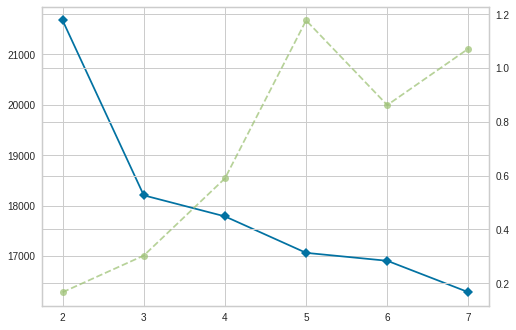

In [43]:
from yellowbrick.cluster.elbow import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,8), metric='calinski_harabaz', timings=True,locate_elbow=True)

visualizer.fit(reduced_data)        # Fit the data to the visualizer
visualizer       # Finalize and render the figure

In [0]:
clusterer = KMeans(n_clusters=3, random_state=100)
clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)
centers = clusterer.cluster_centers_
#sample_preds = clusterer.predict(pca_samples)
# Display the results of the clustering from implementation
#vs.cluster_results(reduced_data, preds, centers,)

In [0]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = df.keys())
true_centers.index = segments
display(true_centers)

,base_repo_forks,base_repo_watchers,base_repo_open_issue_count
Segment 0,810.0,3023.0,173.0
Segment 1,30.0,110.0,7.0
Segment 2,209.0,858.0,21.0
Segment 3,63.0,189.0,61.0


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

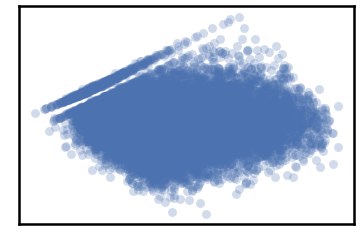

In [0]:
plt.scatter(reduced_data["Dimension 1"].T, reduced_data["Dimension 2"].T, c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [0]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(reduced_data["Dimension 1"].T, reduced_data["Dimension 2"].T, c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)

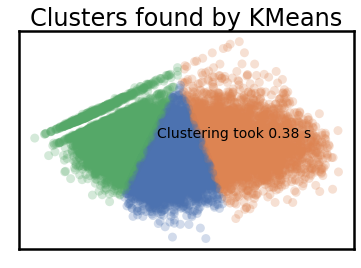

In [0]:
plot_clusters(reduced_data, cluster.KMeans, (), {'n_clusters':3})

In [0]:
plot_clusters(reduced_data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

NameError: ignored